In [72]:
import torch
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)

2.1.0


In [73]:
# 构造一下四个变量线性回归的数据
num_inputs = 4
N = 3000
true_w = torch.tensor([-9, 8.7, -6.5, 4.3]).reshape(-1, 1)
true_b = torch.tensor([-6.4])

features = torch.rand(size=(N, num_inputs)) * 10
labels = torch.matmul(features, true_w)
noise = torch.normal(size=labels.size(), mean=0, std=0.5)
features, labels

(tensor([[0.0681, 9.6363, 0.9832, 7.8815],
         [0.5851, 6.9669, 8.6323, 5.4090],
         [1.7084, 9.9292, 4.1685, 4.5567],
         ...,
         [7.4650, 2.2447, 6.4096, 4.0636],
         [1.9460, 1.4275, 1.4449, 3.2702],
         [4.7694, 5.2539, 7.8002, 2.9756]]),
 tensor([[110.7228],
         [ 22.4955],
         [ 63.5071],
         ...,
         [-71.8450],
         [ -0.4250],
         [-35.1224]]))

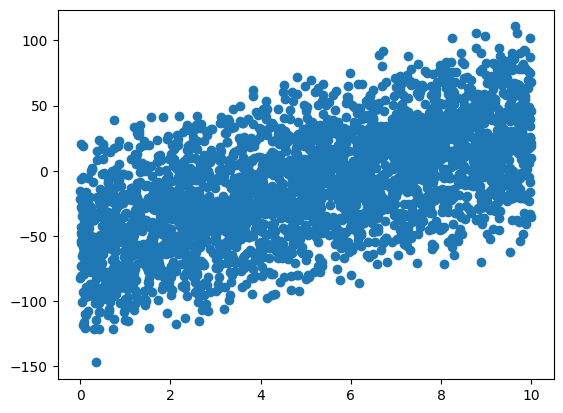

In [74]:
plt.scatter(features[:, 1], labels)
plt.show()

In [75]:
import torch.utils.data as Data

batch_size = 128

dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

for X, y in data_iter:
    print(X.size(), y.size())
    break

torch.Size([128, 4]) torch.Size([128, 1])


In [76]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super().__init__()
        self.weight = nn.Parameter(torch.normal(mean=0, std=0.5, size=(n_feature, 1)))
        self.bias = nn.Parameter(torch.normal(mean=0, std=0.5, size=(1, 1)))

    def forward(self, x):
        return torch.matmul(x, self.weight) + self.bias
print(LinearNet(num_inputs))


LinearNet()


In [77]:
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ('linear1', LinearNet(num_inputs))

]))
net

Sequential(
  (linear1): LinearNet()
)

In [78]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0512],
        [ 0.0186],
        [-0.2979],
        [-0.5011]], requires_grad=True)
Parameter containing:
tensor([[-0.6097]], requires_grad=True)


In [79]:
net(torch.tensor([1, 2, 3, 4], dtype=torch.float32).reshape(1, -1))

tensor([[-3.5217]], grad_fn=<AddBackward0>)

In [80]:
net[0]

LinearNet()

In [81]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([[0.]], requires_grad=True)

In [82]:
loss = nn.MSELoss()
loss

MSELoss()

In [83]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [84]:
num_epochs = 30
for epoch in range(num_epochs):
    for X, y in data_iter:
        y_hat = net(X)
        l = loss(y_hat, y.reshape(y_hat.shape))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d: loss %f' %(epoch + 1, l.item()))

epoch 1: loss 905.224792
epoch 2: loss 376.181915
epoch 3: loss 186.076904
epoch 4: loss 62.214962
epoch 5: loss 29.975092
epoch 6: loss 11.705093
epoch 7: loss 4.648662
epoch 8: loss 3.744387
epoch 9: loss 1.456451
epoch 10: loss 0.601292
epoch 11: loss 0.308314
epoch 12: loss 0.095244
epoch 13: loss 0.037197
epoch 14: loss 0.022880
epoch 15: loss 0.008758
epoch 16: loss 0.005380
epoch 17: loss 0.002500
epoch 18: loss 0.001712
epoch 19: loss 0.001234
epoch 20: loss 0.000781
epoch 21: loss 0.000768
epoch 22: loss 0.000671
epoch 23: loss 0.000575
epoch 24: loss 0.000665
epoch 25: loss 0.000546
epoch 26: loss 0.000633
epoch 27: loss 0.000631
epoch 28: loss 0.000632
epoch 29: loss 0.000652
epoch 30: loss 0.000598


In [85]:
net[0].weight, true_w

(Parameter containing:
 tensor([[-8.9959],
         [ 8.7042],
         [-6.4958],
         [ 4.3041]], requires_grad=True),
 tensor([[-9.0000],
         [ 8.7000],
         [-6.5000],
         [ 4.3000]]))

In [86]:
net[0].bias, true_b

(Parameter containing:
 tensor([[-0.0887]], requires_grad=True),
 tensor([-6.4000]))